# 前向逐步回归

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from numpy import *

### 加载数据

In [2]:
def loadDataSet(fileName):                 
    """ 加载数据
        解析以tab键分隔的文件中的浮点数
    Returns：
        dataMat ：  feature 对应的数据集
        labelMat ： feature 对应的分类标签，即类别标签

    """
    # 获取样本特征的总数，不算最后的目标变量 
    numFeat = len(open(fileName).readline().split('\t')) - 1 
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        # 读取每一行
        lineArr =[]
        # 删除一行中以tab分隔的数据前后的空白符号
        curLine = line.strip().split('\t')
        # i 从0到2，不包括2 
        for i in range(numFeat):
            # 将数据添加到lineArr List中，每一行数据测试数据组成一个行向量           
            lineArr.append(float(curLine[i]))
            # 将测试数据的输入数据部分存储到dataMat 的List中
        dataMat.append(lineArr)
        # 将每一行的最后一个数据，即类别，或者叫目标变量存储到labelMat List中
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

In [13]:
def standRegres(xArr,yArr):
    # mat()函数将xArr，yArr转换为矩阵 mat().T 代表的是对矩阵进行转置操作
    xMat = mat(xArr)
    yMat = mat(yArr).T
    # 矩阵乘法的条件是左矩阵的列数等于右矩阵的行数
    xTx = xMat.T*xMat
    # 因为要用到xTx的逆矩阵，所以事先需要确定计算得到的xTx是否可逆，条件是矩阵的行列式不为0
    # linalg.det() 函数是用来求得矩阵的行列式的，如果矩阵的行列式为0，则这个矩阵是不可逆的，就无法进行接下来的运算                   
    if linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    # 最小二乘法，求得w的最优解
    ws = xTx.I * (xMat.T*yMat)            
    return ws

In [5]:
def rssError(yArr, yHatArr):
    return ((yArr - yHatArr) ** 2).sum()

In [7]:
# 按列进行规范化
def regularize(xMat):
    inMat = xMat.copy()
    inMeans = mean(inMat, 0)  # 计算平均值然后减去它
    inVar = var(inMat, 0)  # 计算除以Xi的方差
    inMat = (inMat - inMeans) / inVar
    return inMat

In [27]:
def stageWise(xArr,yArr,eps=0.01,numIt=100):
    xMat = mat(xArr); yMat=mat(yArr).T
    yMean = mean(yMat,0)
    yMat = yMat - yMean     # 也可以规则化ys但会得到更小的coef
    xMat = regularize(xMat)
    m,n=shape(xMat)
    returnMat = zeros((numIt,n)) # 测试代码删除
    ws = zeros((n,1)); wsTest = ws.copy(); wsMax = ws.copy()
    for i in range(numIt):
        print (ws.T)
        lowestError = inf; 
        for j in range(n):
            for sign in [-1,1]:
                wsTest = ws.copy()
                wsTest[j] += eps*sign
                yTest = xMat*wsTest
                rssE = rssError(yMat.A,yTest.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:]=ws.T
    return returnMat


#test for stageWise
def regression4():
    xArr,yArr=loadDataSet("8.Regression/abalone.txt")
    returnMat = stageWise(xArr,yArr,0.01,200)
    
    xMat = mat(xArr)
    yMat = mat(yArr).T
    xMat = regularize(xMat)
    yM = mean(yMat,0)
    yMat = yMat - yM
    weights = standRegres(xMat, yMat.T)
    return returnMat

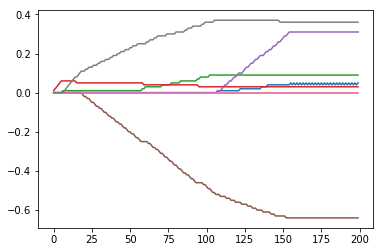

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.show()

In [8]:
type(mat(eye(5)))

numpy.matrixlib.defmatrix.matrix

In [7]:
mat(eye(5))

matrix([[1.]])

In [12]:
type(eye(5))

numpy.ndarray